In [2]:
library(randomForest)
library(rpart)
wholeSet = read.csv("./merged.csv")
trainingSize = nrow(wholeSet) * .9
trainingSetIndices = sample(1:nrow(wholeSet), trainingSize)
testingSetIndices = setdiff(rownames(wholeSet),trainingSetIndices)
trainingSet = wholeSet[trainingSetIndices,]
testingSet = wholeSet[testingSetIndices,]
formula = set~iperf+sysbench+ycruncher+pgbench


# Random Forest - Regression
treat n as continuous value

In [3]:
modelRandomForest <- randomForest(
    formula,
    data=trainingSet,
    mtry=4,
    ntree=1001
)
modelRandomForest


Call:
 randomForest(formula = formula, data = trainingSet, mtry = 4,      ntree = 1001) 
               Type of random forest: regression
                     Number of trees: 1001
No. of variables tried at each split: 4

          Mean of squared residuals: 0.5741611
                    % Var explained: 96.19

In [5]:
predicted <- predict(modelRandomForest, testingSet)
cat("R-squared:",cor(predicted, testingSet[,'set'])^2,"\n")


R-squared: 0.9656667 


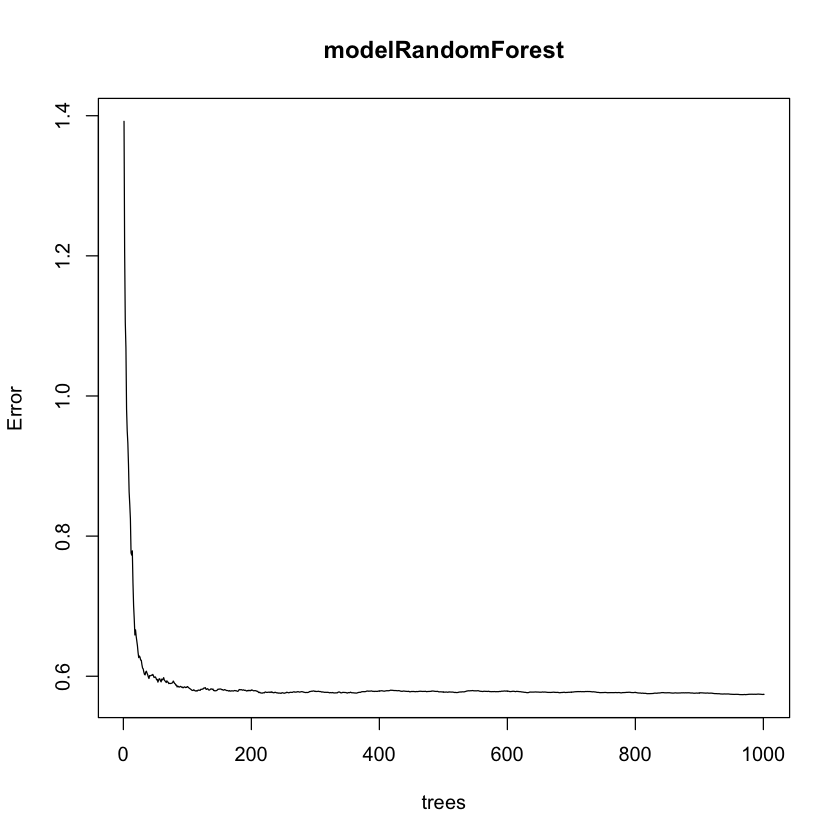

In [6]:
par(mfrow=c(1,1))
plot(modelRandomForest)

In [7]:
test.err= with(testingSet, mean( (set - predicted)^2))
test.err# Mean of squared residuals:

[1] 0.5065128

In [8]:
oob.err = double(4)
test.err = double(4)
for(mtry in 1:4) 
{
  rf=randomForest(formula = formula , data = trainingSet, mtry=mtry,ntree=400) 
  oob.err[mtry] = rf$mse[400] #Error of all Trees fitted
  
  pred<-predict(rf,testingSet) #Predictions on Test Set for each Tree
  test.err[mtry]= with(testingSet, mean( (set - pred)^2)) #Mean Squared Test Error
  
  cat(mtry," ") #printing the output to the console
  
}

1  2  3  4  

[1] 0.8177480 0.5468933 0.4970100 0.5107213

[1] 0.8351472 0.6278670 0.5950816 0.5756926

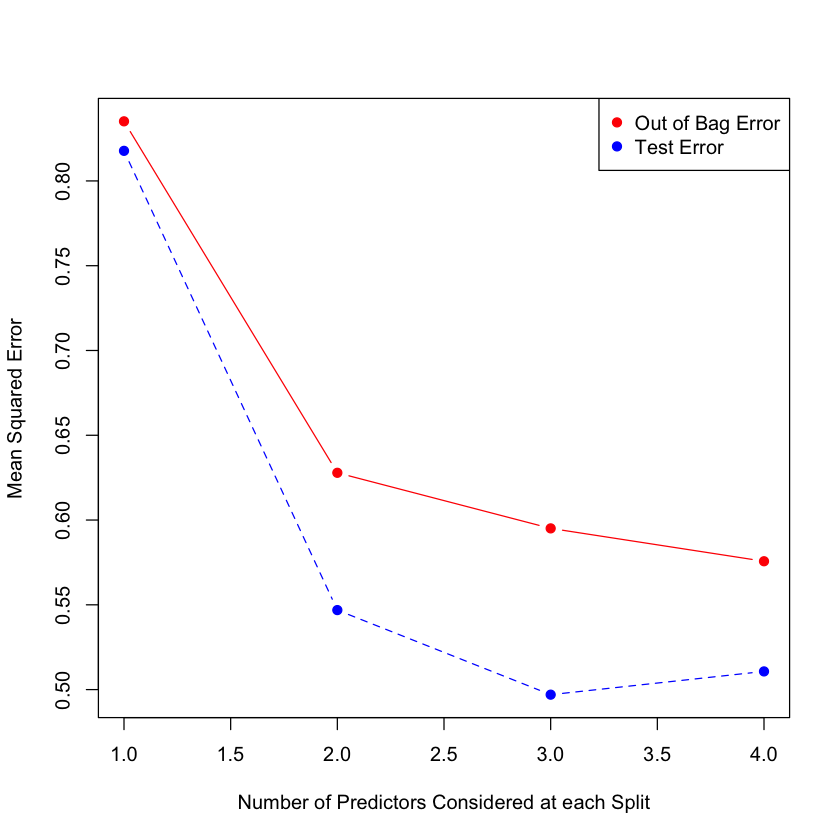

In [9]:
test.err
oob.err
matplot(1:mtry , cbind(oob.err,test.err), pch=19 , col=c("red","blue"),type="b",ylab="Mean Squared Error",xlab="Number of Predictors Considered at each Split")
legend("topright",legend=c("Out of Bag Error","Test Error"),pch=19, col=c("red","blue"))

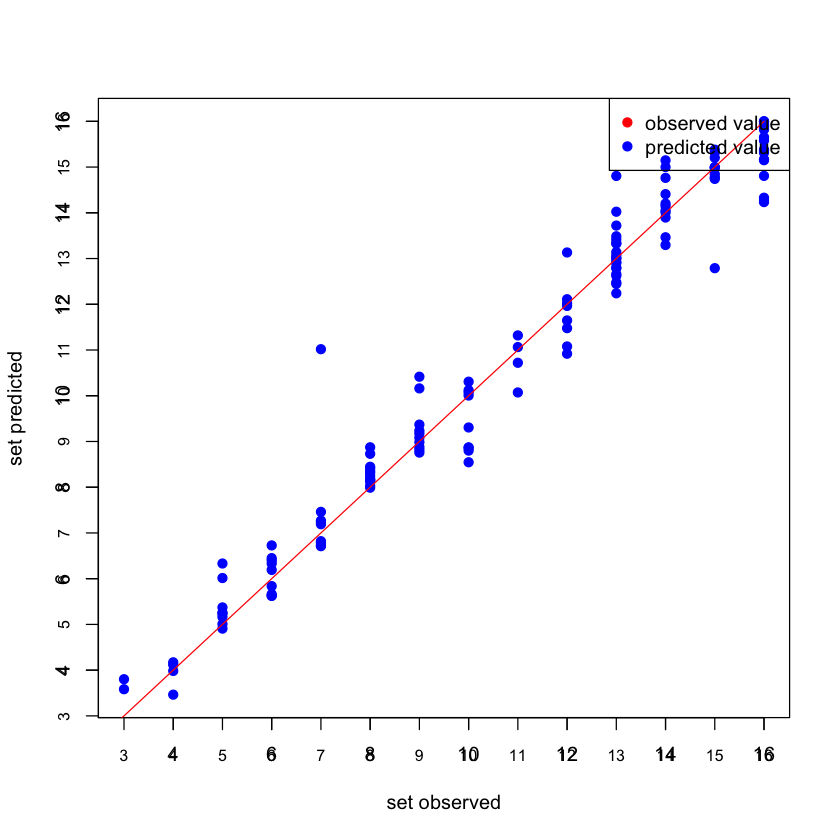

In [10]:
comparason = cbind(pred,testingSet['set'])
plot(x = comparason$set , y = comparason$pred,col="blue",pch=19,xlab="set observed",ylab="set predicted")
axis(1,1:16,1:16,cex.axis=0.8)
axis(2,1:16,1:16,cex.axis=0.8)
par(new=TRUE)
lines(x = range(1:16) , y = range(1:16),col="red")
legend("topright",legend=c("observed value","predicted value"),pch=19, col=c("red","blue"))

# finalize

In [11]:
saveRDS(modelRandomForest, "./modelRandomForest.rds")